In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better viewing of DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Libraries imported successfully and display options set!")

Libraries imported successfully and display options set!


Load the Dataset:
In a new cell, load the transactions.csv file. Remember, it's in the data/raw/ directory relative to your project root. Your notebook is in notebooks/, so you'll need to go "up one level" and then into data/raw.

In [3]:
# Load the dataset
file_path = '../data/raw/transactions.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully from: {file_path}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully from: ../data/raw/transactions.csv
Number of rows: 95662
Number of columns: 16


Display the first few rows (Overview of Data):
This gives you a quick glance at the data structure, column names, and sample values.

In [4]:
# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
display(df.head())
# Get general information about the DataFrame
print("\nDataFrame Info:")
df.info()


First 5 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.000,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.000,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.000,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.000,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.000,644,2018-11-15T03:34:21Z,2,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fr

In [5]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(df.describe())


Summary Statistics for Numerical Columns:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.000,95662.000,95662.000,95662.000,95662.000
mean,256.000,6717.846,9900.584,2.256,0.002
std,0.000,123306.797,123122.088,0.733,0.045
min,256.000,-1000000.000,2.000,0.000,0.000
25%,256.000,-50.000,275.000,2.000,0.000
50%,256.000,1000.000,1000.000,2.000,0.000
75%,256.000,2800.000,5000.000,2.000,0.000
max,256.000,9880000.000,9880000.000,4.000,1.000


In [6]:
# Identify categorical columns (objects and potentially some int64 that are codes)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Also consider CountryCode, PricingStrategy, FraudResult as they are codes/binary
categorical_cols.extend(['CountryCode', 'PricingStrategy', 'FraudResult'])

print("\nSummary Statistics for Categorical Columns (Value Counts):")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    # For columns with many unique values (like IDs), only show top N or unique count
    if df[col].nunique() > 50: # Arbitrary threshold, adjust if needed
        print(f"Number of unique values: {df[col].nunique()}")
        print("Top 5 most frequent values:")
        print(df[col].value_counts().head())
    else:
        print(df[col].value_counts())
        # Also show percentage
        print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


Summary Statistics for Categorical Columns (Value Counts):

--- TransactionId ---
Number of unique values: 95662
Top 5 most frequent values:
TransactionId
TransactionId_35670    1
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
Name: count, dtype: int64

--- BatchId ---
Number of unique values: 94809
Top 5 most frequent values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64

--- AccountId ---
Number of unique values: 3633
Top 5 most frequent values:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64

--- SubscriptionId ---
Number of unique values: 3627
Top 5 most frequent values:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Nam

Plot Histograms/KDEs for Amount and Value:
These are highly skewed, so a direct histogram might be hard to read due to outliers. We can also try log-transformations.


Visualizing Distribution of Numerical Features:


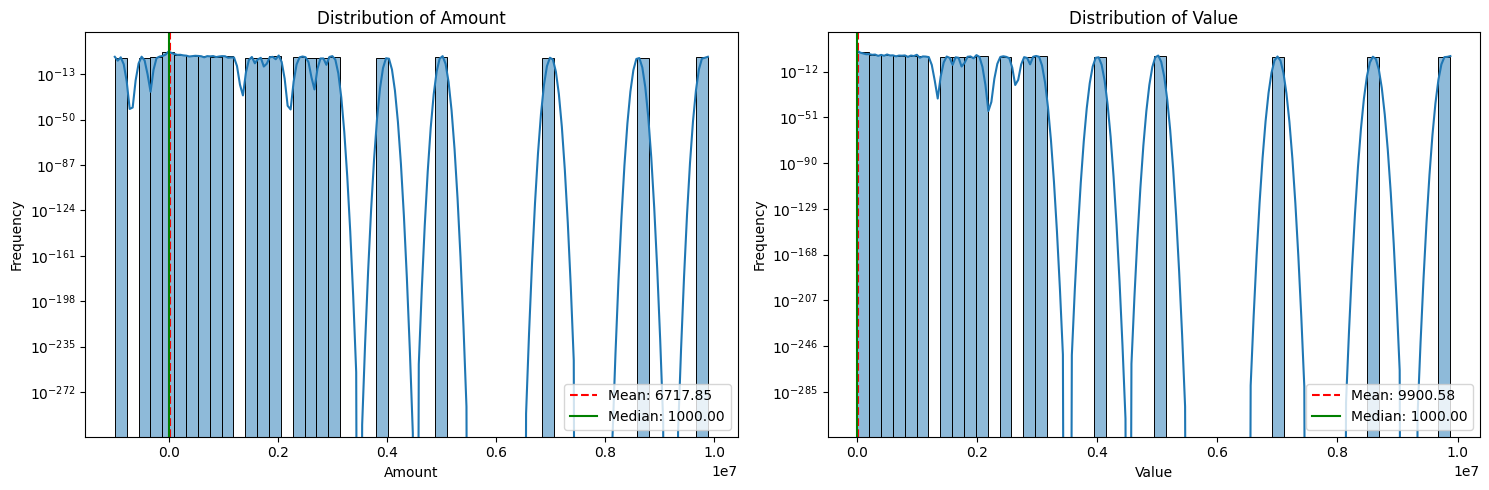


Amount Distribution (focus on positive and negative values):


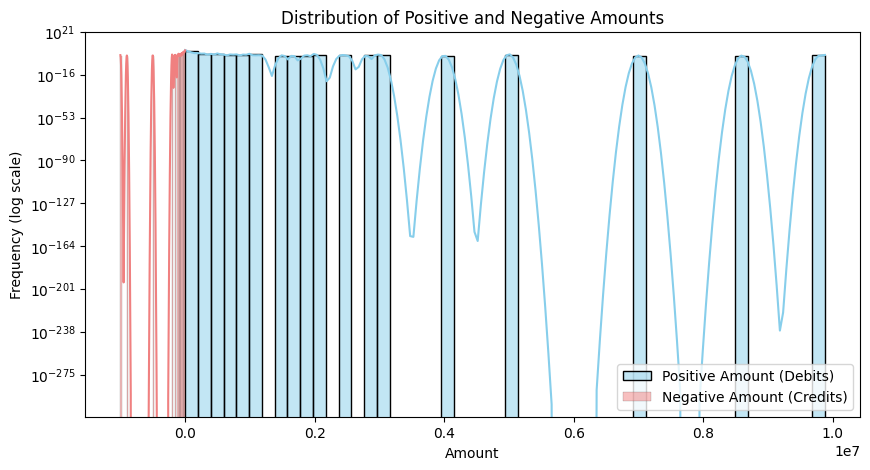

In [7]:
print("\nVisualizing Distribution of Numerical Features:")

# Convert TransactionStartTime to datetime (important for time-based features later)
# This also allows us to filter/sort by time if needed for analysis
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Exclude constant 'CountryCode' and binary 'FraudResult' for distribution plots
numerical_cols_for_dist = ['Amount', 'Value']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols_for_dist):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.yscale('log') # Use log scale for y-axis due to high frequency of small values
    plt.axvline(df[col].mean(), color='r', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='g', linestyle='-', label=f'Median: {df[col].median():.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

# Further investigate Amount due to negative values
print("\nAmount Distribution (focus on positive and negative values):")
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Amount'] > 0]['Amount'], kde=True, bins=50, color='skyblue', label='Positive Amount (Debits)')
sns.histplot(df[df['Amount'] < 0]['Amount'], kde=True, bins=50, color='lightcoral', label='Negative Amount (Credits)')
plt.title('Distribution of Positive and Negative Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.legend()
plt.show()


Box Plots for Amount and Value (Outlier Detection):


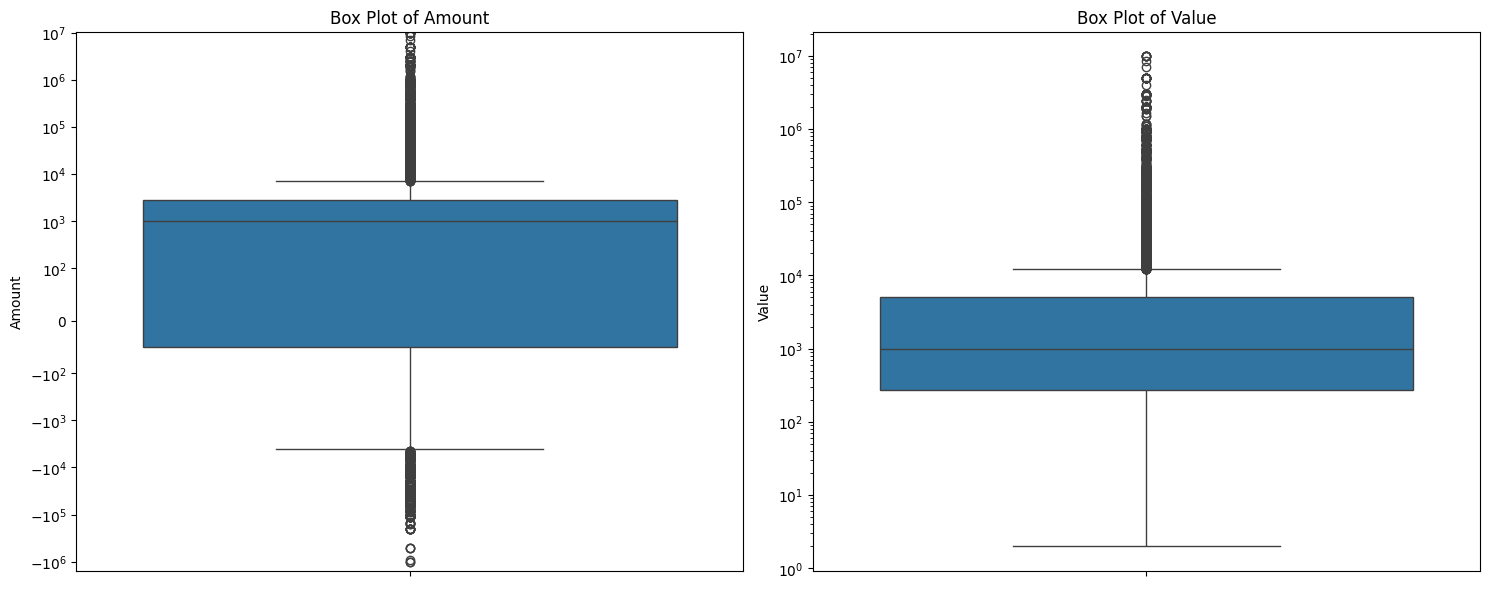


Histograms (Filtered for Visualization, log scale on Y):


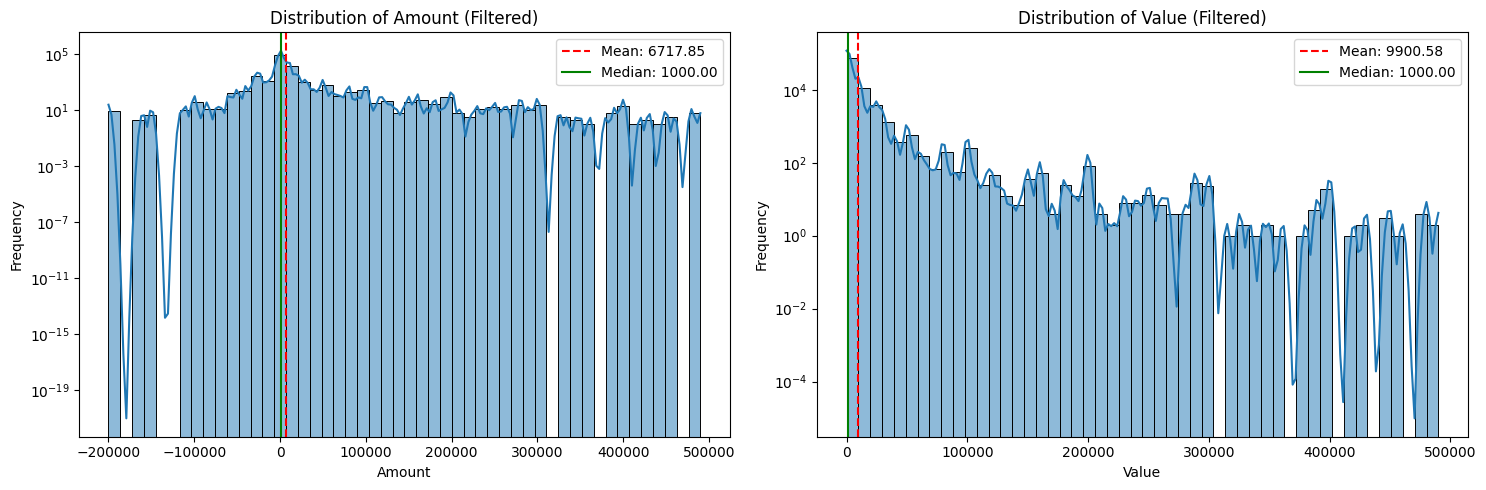


Distribution of Log-Transformed Value (Value_log):


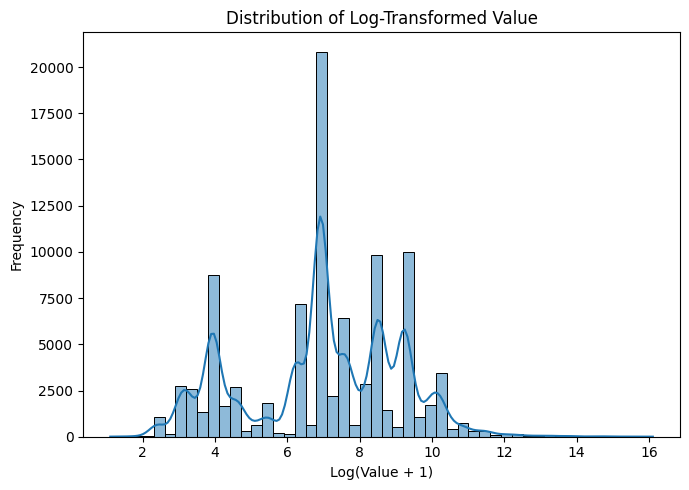

In [8]:
print("\nBox Plots for Amount and Value (Outlier Detection):")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Amount'])
plt.title('Box Plot of Amount')
plt.ylabel('Amount')
plt.yscale('symlog', linthresh=100) # Use symmetrical log scale to handle negative values and large range
# A standard log scale can't handle zero or negative values directly. symlog handles this.
# linthresh helps define the linear region around zero.

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Value'])
plt.title('Box Plot of Value')
plt.ylabel('Value')
plt.yscale('log') # Value is always positive, so standard log scale is fine

plt.tight_layout()
plt.show()

# Now, let's try histograms again, but with a focus on the main body of the data,
# or using a different binning strategy / transformation if the symlog doesn't clarify.
# For now, let's try to remove extreme outliers for histogram view.

# Filter out extreme outliers for better visualization of the bulk of data
# (These are just for visualization, not removing from original DF yet)
df_filtered_amount = df[(df['Amount'] > -500000) & (df['Amount'] < 500000)] # Adjust bounds as needed based on boxplot
df_filtered_value = df[df['Value'] < 500000] # Adjust bounds as needed

print("\nHistograms (Filtered for Visualization, log scale on Y):")
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filtered_amount['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount (Filtered)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.axvline(df['Amount'].mean(), color='r', linestyle='--', label=f'Mean: {df["Amount"].mean():.2f}')
plt.axvline(df['Amount'].median(), color='g', linestyle='-', label=f'Median: {df["Amount"].median():.2f}')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_filtered_value['Value'], kde=True, bins=50)
plt.title('Distribution of Value (Filtered)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yscale('log')
plt.axvline(df['Value'].mean(), color='r', linestyle='--', label=f'Mean: {df["Value"].mean():.2f}')
plt.axvline(df['Value'].median(), color='g', linestyle='-', label=f'Median: {df["Value"].median():.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Finally, let's also look at the distributions after a log transformation for modeling considerations
# Add 1 to handle zero values before log transformation for positive values
df['Value_log'] = np.log1p(df['Value'])
# For amount, log transform positive values and separate negative ones if needed, or use a signed log.
# For now, just focus on Value_log as it's typically used for transaction sizes.

print("\nDistribution of Log-Transformed Value (Value_log):")
plt.figure(figsize=(7, 5))
sns.histplot(df['Value_log'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed Value')
plt.xlabel('Log(Value + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Plot Bar Charts for Categorical Features:
We'll focus on columns that have a reasonable number of unique categories to plot. We'll skip IDs (TransactionId, BatchId, AccountId, SubscriptionId, CustomerId) as they have too many unique values for a meaningful bar plot.


Visualizing Distribution of Key Categorical Features:
Removed 'CountryCode' from categorical plots as it is constant.


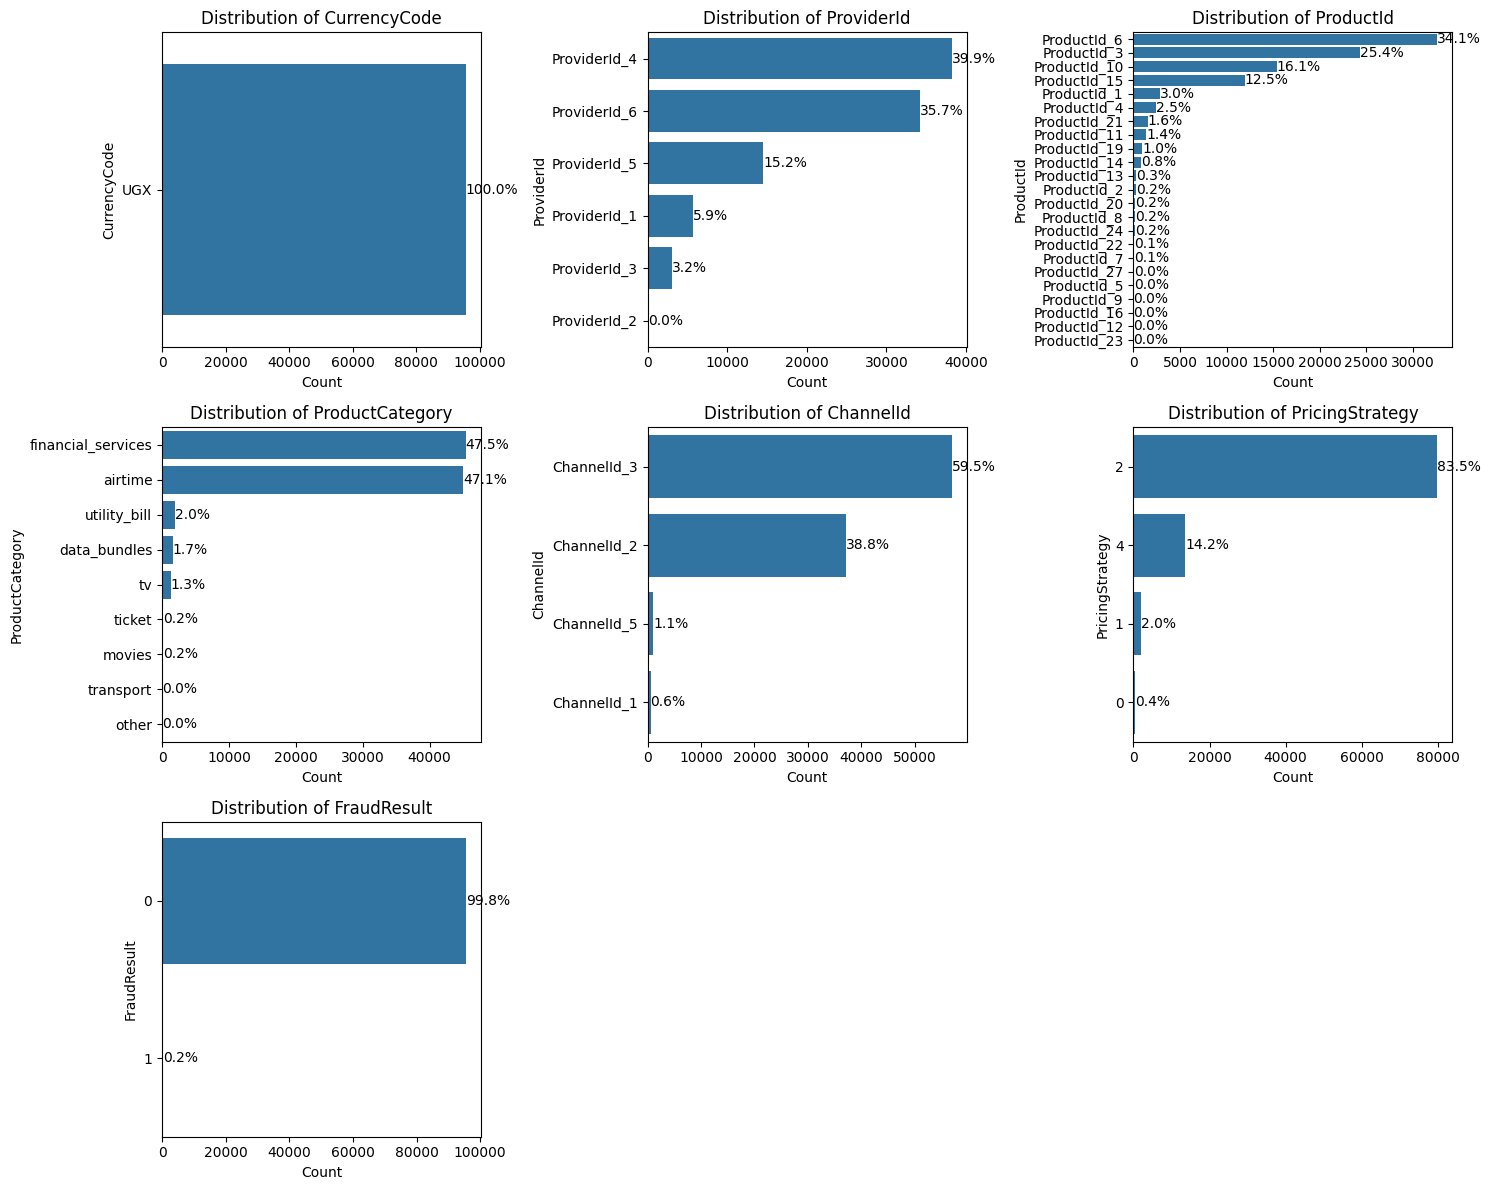

In [9]:
print("\nVisualizing Distribution of Key Categorical Features:")

# Identify categorical columns to plot (excluding IDs with too many unique values)
# Re-using the list from before, but filtering out high-cardinality IDs
categorical_cols_to_plot = [
    col for col in df.select_dtypes(include=['object']).columns.tolist()
    if df[col].nunique() <= 50 # Adjust this threshold if needed
]
# Add numerical-as-categorical columns
categorical_cols_to_plot.extend(['CountryCode', 'PricingStrategy', 'FraudResult'])

# Remove CountryCode if it's truly constant
if 'CountryCode' in categorical_cols_to_plot and df['CountryCode'].nunique() == 1:
    categorical_cols_to_plot.remove('CountryCode')
    print("Removed 'CountryCode' from categorical plots as it is constant.")

# Determine number of rows and columns for subplot grid
n_cols = 3
n_rows = (len(categorical_cols_to_plot) + n_cols - 1) // n_cols # Ceiling division
plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size as needed

for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index) # Use y for horizontal bars, order by frequency
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    # Add value percentages
    total = float(len(df))
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_width()
        y = p.get_y() + p.get_height()/2
        plt.gca().annotate(percentage, (x, y), ha='left', va='center')

plt.tight_layout()
plt.show()

Explore relationship between Amount/Value and FraudResult:
Although FraudResult isn't our credit risk proxy, understanding its relationship with monetary values can be insightful. Often, fraud transactions have different monetary patterns.


Bivariate Analysis: Amount/Value vs. FraudResult


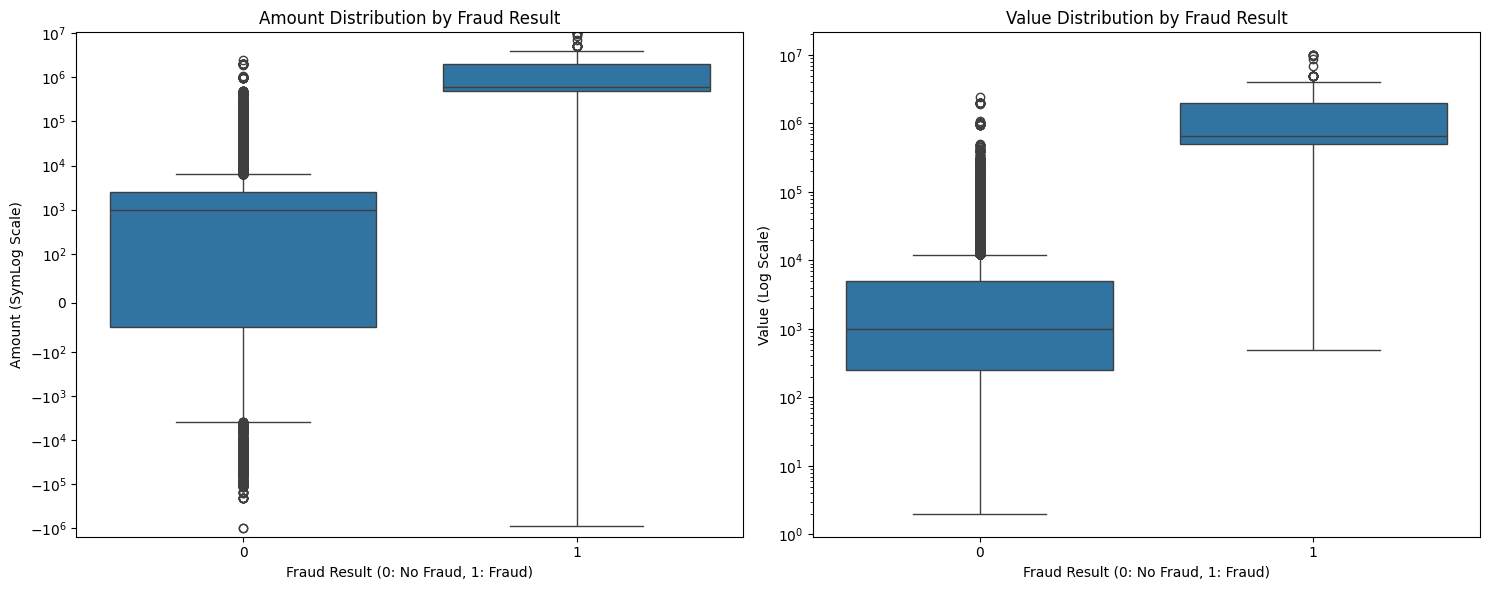


Mean and Median Amount/Value by FraudResult:
                 Amount                  Value           
                   mean     median        mean     median
FraudResult                                              
0              3627.723   1000.000    6763.227   1000.000
1           1535272.389 600000.000 1561819.539 650000.000


In [10]:
print("\nBivariate Analysis: Amount/Value vs. FraudResult")

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='FraudResult', y='Amount', data=df)
plt.title('Amount Distribution by Fraud Result')
plt.xlabel('Fraud Result (0: No Fraud, 1: Fraud)')
plt.ylabel('Amount (SymLog Scale)')
plt.yscale('symlog', linthresh=100) # Use symlog for Amount

plt.subplot(1, 2, 2)
sns.boxplot(x='FraudResult', y='Value', data=df)
plt.title('Value Distribution by Fraud Result')
plt.xlabel('Fraud Result (0: No Fraud, 1: Fraud)')
plt.ylabel('Value (Log Scale)')
plt.yscale('log') # Use log for Value

plt.tight_layout()
plt.show()

# Calculate mean/median for Amount and Value by FraudResult
print("\nMean and Median Amount/Value by FraudResult:")
print(df.groupby('FraudResult')[['Amount', 'Value']].agg(['mean', 'median']))


Bivariate Analysis: Categorical Features vs. FraudResult (Proportions)

--- ProductCategory vs. FraudResult ---
FraudResult              0     1
ProductCategory                 
airtime             99.960 0.040
data_bundles       100.000 0.000
financial_services  99.650 0.350
movies             100.000 0.000
other              100.000 0.000
ticket             100.000 0.000
transport           92.000 8.000
tv                 100.000 0.000
utility_bill        99.380 0.620


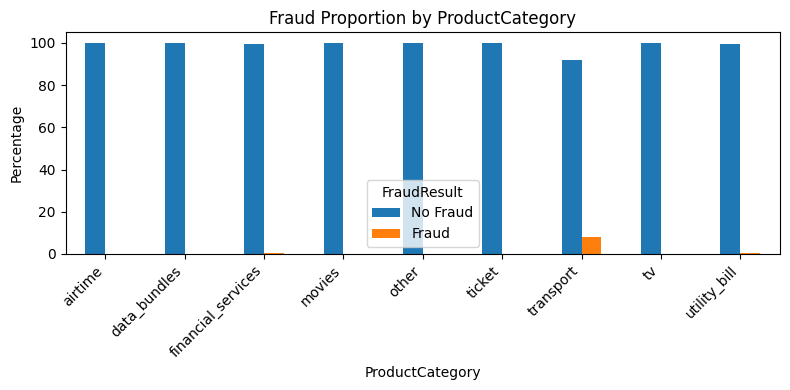


--- ChannelId vs. FraudResult ---
FraudResult       0     1
ChannelId                
ChannelId_1  99.260 0.740
ChannelId_2  99.990 0.010
ChannelId_3  99.680 0.320
ChannelId_5 100.000 0.000


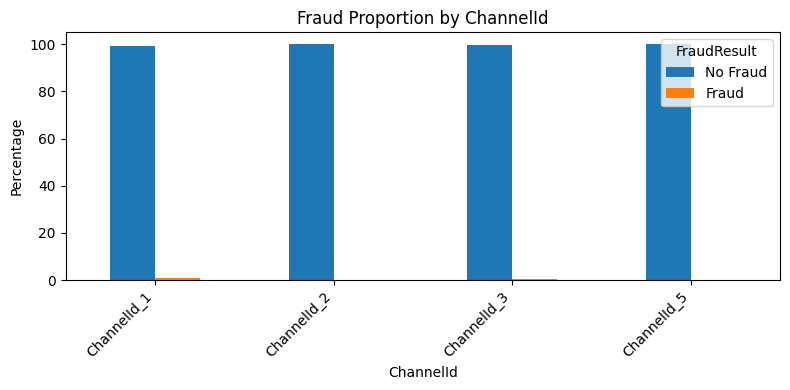


--- PricingStrategy vs. FraudResult ---
FraudResult          0     1
PricingStrategy             
0               90.650 9.350
1               99.630 0.370
2               99.830 0.170
4               99.920 0.080


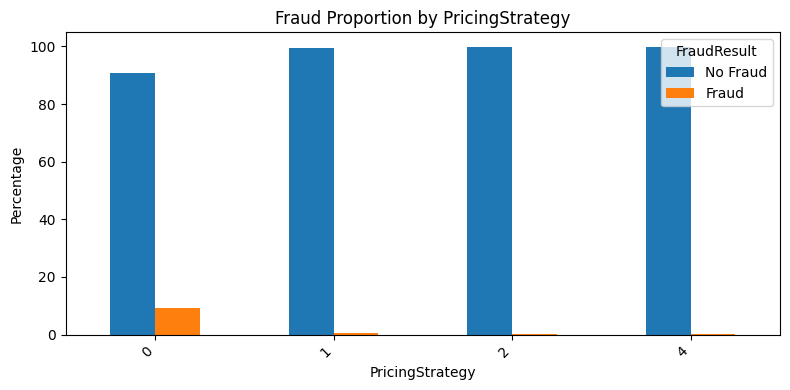


--- ProviderId vs. FraudResult ---
FraudResult        0     1
ProviderId                
ProviderId_1  98.990 1.010
ProviderId_2 100.000 0.000
ProviderId_3  97.920 2.080
ProviderId_4  99.990 0.010
ProviderId_5  99.560 0.440
ProviderId_6  99.990 0.010


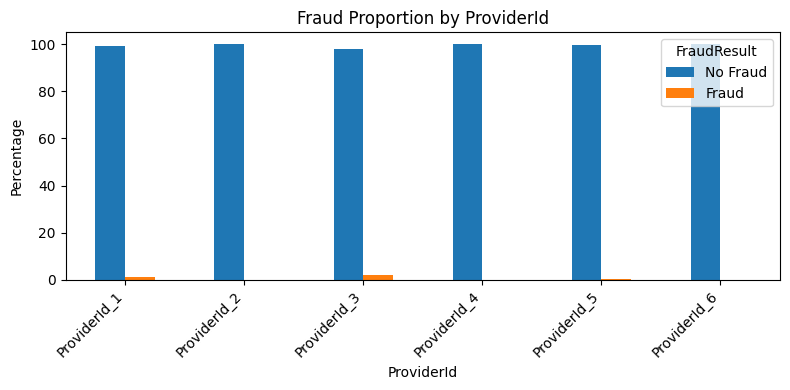

In [ ]:
print("\nBivariate Analysis: Categorical Features vs. FraudResult (Proportions)")

categorical_features_for_bivariate = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'ProviderId']

for col in categorical_features_for_bivariate:
    print(f"\n--- {col} vs. FraudResult ---")
    # Calculate cross-tabulation with normalized percentages
    cross_tab = pd.crosstab(df[col], df['FraudResult'], normalize='index') * 100
    print(cross_tab.round(2))
    # Plotting (optional, but good for visual summary)
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f'Fraud Proportion by {col}')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='FraudResult', labels=['No Fraud', 'Fraud'])
    plt.tight_layout()
    plt.show()